In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [2]:
df=pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
df['Height'] = pd.to_numeric(df['Height'],errors='coerce')

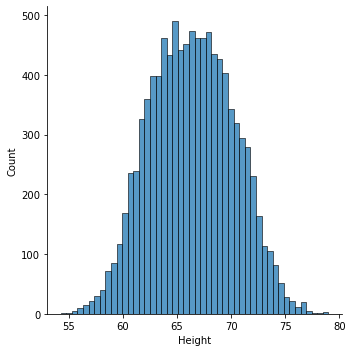

In [4]:
plot=sns.displot(x="Height",  data=df)

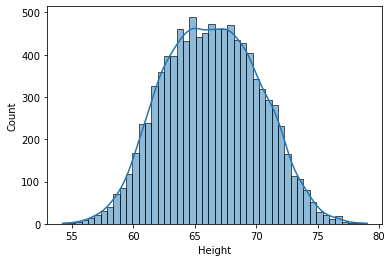

In [5]:
hist=sns.histplot(data=df, x="Height",kde=True)

In [6]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [7]:
range=df.Height.max()-df.Height.min()
range

24.735609021292504

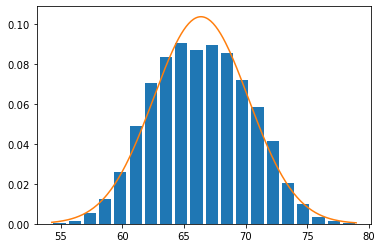

In [8]:
#plot histogram and bell curve 
plt.hist(df.Height,bins=20,rwidth=0.8,density=True)
rng=np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.Height.mean(),df.Height.std()))
plt.show()

In [9]:
#standard deviation to remove outliers
upper_limit=df.Height.mean()+3*df.Height.std()
upper_limit

77.91014411714076

In [10]:
#standard deviation to remove outliers
lower_limit=df.Height.mean()-3*df.Height.std()
lower_limit

54.82497539250136

In [11]:
#"bitwise" | (or) or & (and) operations
df[(df.Height>upper_limit)|(df.Height<lower_limit )]


,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [12]:
df[(df.Height<upper_limit) & (df.Height>lower_limit )]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [13]:
no_outlier_std=df[(df.Height<upper_limit) & (df.Height>lower_limit )]
no_outlier_std.shape

(9993, 3)

In [14]:
df.shape[0]-no_outlier_std.shape[0]

7

In [15]:
#use z score to remove outliers
df["zscore"]=(df.Height - df.Height.mean())/df.Height.std()
df.head(20)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
5,Male,67.253016,152.212156,0.230136
6,Male,68.785081,183.927889,0.628331
7,Male,68.348516,167.971110,0.514865
8,Male,67.018950,175.929440,0.169301
9,Male,63.456494,156.399676,-0.756607


In [16]:
df[(df.zscore>3) | (df.zscore<-3)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [17]:
df[(df.zscore<3) & (df.zscore>-3)]

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [18]:
no_outlier_zscore=df[(df.zscore<3) & (df.zscore>-3)]

In [19]:
df.shape[0]-no_outlier_zscore.shape[0]

7

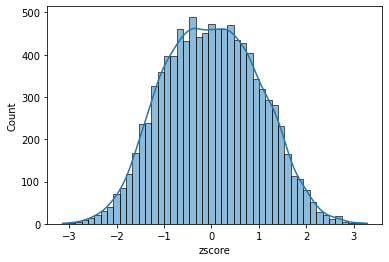

In [20]:
hist=sns.histplot(data=df, x="zscore",kde=True)